In [1]:
import os
import pickle
import numpy as np
from keras.models import Sequential
import gensim
from keras.layers.recurrent import LSTM,SimpleRNN
from sklearn.model_selection import train_test_split
import theano
theano.config.optimizer="None"

Using TensorFlow backend.
/home/rukesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rukesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rukesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rukesh/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
with open('conversationbot.pickle','rb') as f:
    vec_x,vec_y=pickle.load(f) 

In [3]:
vec_x=np.array(vec_x,dtype=np.float64)
vec_y=np.array(vec_y,dtype=np.float64)

In [4]:
# vec_x

In [5]:
x_train,x_test, y_train,y_test = train_test_split(vec_x, vec_y, test_size=0.2, random_state=0)

In [6]:
model=Sequential()
model.add(LSTM(output_dim=300,input_shape=x_train.shape[1:],return_sequences=True, init='he_uniform', inner_init='he_uniform', activation='relu'))
model.add(LSTM(output_dim=300,input_shape=x_train.shape[1:],return_sequences=True, init='he_uniform', inner_init='he_uniform', activation='relu'))
model.add(LSTM(output_dim=300,input_shape=x_train.shape[1:],return_sequences=True, init='he_uniform', inner_init='he_uniform', activation='relu'))
model.add(LSTM(output_dim=300,input_shape=x_train.shape[1:],return_sequences=True, init='he_uniform', inner_init='he_uniform', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

/home/rukesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(15, 300), return_sequences=True, activation="relu", units=300, kernel_initializer="he_uniform", recurrent_initializer="he_uniform")`
  
/home/rukesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(15, 300), return_sequences=True, activation="relu", units=300, kernel_initializer="he_uniform", recurrent_initializer="he_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rukesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(15, 300), return_sequences=True, activation="relu", units=300, kernel_initializer="he_uniform", recurrent_initializer="he_uniform")`
  after removing the cwd from sys.path.
/home/rukesh/.local/lib/pytho

In [7]:
history = model.fit(x_train, y_train, nb_epoch=130,batch_size=128, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/rukesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Train on 503 samples, validate on 126 samples
Epoch 1/130
503/503 [==============================] - 3s 6ms/step - loss: -12.1753 - accuracy: 0.0050 - val_loss: -22.7467 - val_accuracy: 0.0048
Epoch 2/130
503/503 [==============================] - 2s 5ms/step - loss: -27.1289 - accuracy: 0.0117 - val_loss: -26.8198 - val_accuracy: 5.2910e-04
Epoch 3/130
503/503 [==============================] - 2s 5ms/step - loss: -31.5063 - accuracy: 0.0021 - val_loss: -29.8992 - val_accuracy: 5.2910e-04
Epoch 4/130
503/503 [==============================] - 2s 5ms/step - loss: -34.0206 - accuracy: 0.0038 - val_loss: -31.0935 - val_accuracy: 0.0021
Epoch 5/130
503/503 [==============================] - 2s 5ms/step - loss: -35.1689 - accuracy: 0.0064 - val_loss: -31.8708 - val_accuracy: 0.0026
Epoch 6/130
503/503 [==============================] - 2s 5ms/step - loss: -34.9652 - accuracy: 0.0046 - val_loss: -32.0990 - val_accuracy: 0.0079
Epoch 7/130
503/503 [==============================] - 2s 5ms/s

503/503 [==============================] - 2s 5ms/step - loss: -60.3846 - accuracy: 0.0228 - val_loss: -55.5814 - val_accuracy: 0.0228
Epoch 55/130
503/503 [==============================] - 2s 5ms/step - loss: -59.4834 - accuracy: 0.0085 - val_loss: -54.1187 - val_accuracy: 0.0095
Epoch 56/130
503/503 [==============================] - 2s 5ms/step - loss: -60.1501 - accuracy: 0.0028 - val_loss: -56.0336 - val_accuracy: 0.0000e+00
Epoch 57/130
503/503 [==============================] - 2s 5ms/step - loss: -60.5301 - accuracy: 3.9761e-04 - val_loss: -54.1980 - val_accuracy: 0.0000e+00
Epoch 58/130
503/503 [==============================] - 2s 5ms/step - loss: -60.2685 - accuracy: 3.9761e-04 - val_loss: -57.9046 - val_accuracy: 0.0011
Epoch 59/130
503/503 [==============================] - 2s 5ms/step - loss: -62.2843 - accuracy: 0.0020 - val_loss: -57.8047 - val_accuracy: 5.2910e-04
Epoch 60/130
503/503 [==============================] - 2s 5ms/step - loss: -60.8827 - accuracy: 0.0016 -

503/503 [==============================] - 2s 5ms/step - loss: -62.7344 - accuracy: 0.0152 - val_loss: -58.3565 - val_accuracy: 0.0153
Epoch 109/130
503/503 [==============================] - 2s 5ms/step - loss: -62.7697 - accuracy: 0.0156 - val_loss: -58.8425 - val_accuracy: 0.0153
Epoch 110/130
503/503 [==============================] - 2s 5ms/step - loss: -63.2848 - accuracy: 0.0127 - val_loss: -59.2198 - val_accuracy: 0.0085
Epoch 111/130
503/503 [==============================] - 2s 5ms/step - loss: -63.2706 - accuracy: 0.0106 - val_loss: -59.2085 - val_accuracy: 0.0085
Epoch 112/130
503/503 [==============================] - 2s 5ms/step - loss: -63.4034 - accuracy: 0.0115 - val_loss: -59.3330 - val_accuracy: 0.0079
Epoch 113/130
503/503 [==============================] - 2s 5ms/step - loss: -62.5939 - accuracy: 0.0115 - val_loss: -58.5912 - val_accuracy: 0.0074
Epoch 114/130
503/503 [==============================] - 2s 5ms/step - loss: -63.3682 - accuracy: 0.0237 - val_loss: -55

In [8]:
model.save('chatbotmodel.h5')

In [13]:

print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


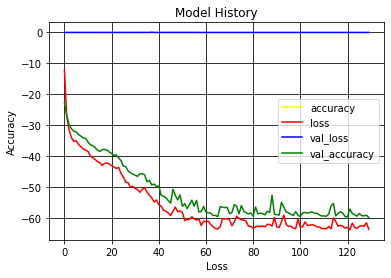

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='yellow',label='accuracy')
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_accuracy'],color='blue',label = "val_accuracy")
plt.plot(history.history['val_loss'],color='green',label = "val_loss")
plt.title('Model History')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.grid(True,color='k')
plt.legend(['accuracy', 'loss','val_loss','val_accuracy'])
plt.show()


In [30]:
# mod = gensim.models.Word2Vec.load('/home/rukesh/Documents/semicolon/thesemicolon/word2vec.bin')

In [31]:
# [mod.most_similar([predictions[10][i]])[0] for i in range(15)]